In [1]:
import numpy as np
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Adding a second Convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Adding a second Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Flattening
classifier.add(Flatten())

# Step 6 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))     #Hidden Layer 1 with 512 nods and relu actification function
classifier.add(Dense(units = 256, activation = 'relu'))     #Hidden Layer 2 with 256 nods and relu actification function
classifier.add(Dense(units = 128, activation = 'relu'))     #Hidden Layer 3 with 5128 nods and relu actification function
classifier.add(Dense(units = 2, activation = 'sigmoid'))   #Output Layer 4 with 62 nods and sigmoid actification function

# Step 7 - Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])   #Adam Optimizer


In [3]:
# Part 8 - Image Pre Processing
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data1/train',
target_size = (128, 128),class_mode = 'categorical')            #Training Set

test_set = test_datagen.flow_from_directory('data1/test',
target_size = (128, 128),class_mode = 'categorical')            #Test Set

# Part 9 - Fitting the CNN to the images
classifier.fit_generator(training_set,
steps_per_epoch = 1000,
epochs = 1,
validation_data = test_set,
validation_steps = 25)                 #10 Iterations and 1000 steps per Iteration

#Part 10 - Saving the model
classifier.save('face.model')      #Saving the file with .model extension included weights

#model_json = classifier.to_json()       #.model to .json conversion
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)         #Saving the file with .json extension excluded weights
#classifier.save_weights("model.h5")     #Saving the weights with .h5 extension

# Part 11 - Image Pre Processing for prediction Image
test_image = image.load_img('data1/1.png', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# Part 12 - New image prediction
result = classifier.predict(test_image)
print(training_set.class_indices)
print(result)
print(np.argmax(result))

Found 743 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Epoch 1/1
1000/1000 [==============================] - 776s 776ms/step - loss: 0.0283 - accuracy: 0.9860 - val_loss: 1.2852e-07 - val_accuracy: 1.0000
{'aditi': 0, 'ram': 1}
[[0. 1.]]
1


In [4]:
path = 'data1/25.png'

In [5]:
import cv2 as opencv
from matplotlib import pyplot as plt

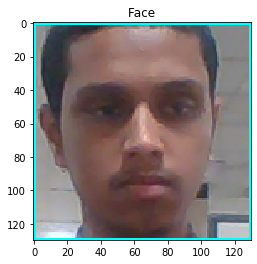

In [6]:
imag = opencv.imread(path, opencv.IMREAD_COLOR)
imag = opencv.cvtColor(imag, opencv.COLOR_BGR2RGB)
plt.imshow(imag)
plt.title('Face')
plt.show()

In [7]:
test_image = image.load_img(path, target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
print(training_set.class_indices)
print(result)
print(np.argmax(result))
if (np.argmax(result)==1):
    print("Ram")
else:
    print("Aditi")

{'aditi': 0, 'ram': 1}
[[0. 1.]]
1
Ram
